# How to build a sales forecast in Python

We will use linear regression to determine the impact of shelf location on sales of Oreos. This dataset is from Wayne L. Winston’s Marketing Analytics: Data-Driven Techniques with Microsoft Excel.Chapter 10 is all about forecasting. I will replicate the forecast exercise done originally in Excel, but in Python. 

**The questions to answer are:** 
1. Does shelf location impact sales? 
2. Can we quantify the impact between the different shelf heights?
3. Can we predict future sales based on historical sales data?

## Import packages

In [1]:
#Locate imported packages
import sys
sys.path

#import pandas and numpy
import pandas as pd
import numpy as np

# Reading an excel file using Python
import os

# From matplotlib, import pyplot under the alias plt
from matplotlib import pyplot as plt

#Import Seaborn
import seaborn as sns

#Import statsmodels ols function
from statsmodels.formula.api import ols

#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

##  Import & Inspect Dataset

In [2]:
# Give the location of your file - In this case an Excel spreadsheet
file = ('datasets/Oreos.xlsx')
 
#Load spreadsheet
data = pd.ExcelFile(file)

## Load a sheet into a DataFrame by name - The name of the sheet is "data"
df = data.parse('data')

#Check results
print(df)

    Observation  Height in feet  Sales
0             1               5     24
1             2               6     56
2             3               7     40
3             4               5     27
4             5               5     22
5             6               6     70
6             7               6     51
7             8               7     38
8             9               7     33
9            10               5     22
10           11               6     63
11           12               7     48


Our Oreos dataset has 3 columns

	1.	Observation number
	2.	Height in feet
	3.	Sales

In [3]:
# We need to change column name for Height in feet column
# Let's remove the extra whitespace
df.columns = df.columns.str.replace(' ', '')

#Check results
print(df.columns.tolist())

['Observation', 'Heightinfeet', 'Sales']


In [4]:
# Check column data types and check for non-missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Observation   12 non-null     int64
 1   Heightinfeet  12 non-null     int64
 2   Sales         12 non-null     int64
dtypes: int64(3)
memory usage: 416.0 bytes
None


## Exploratory Data Analysis & Visualization

Let's visualize our dataset.

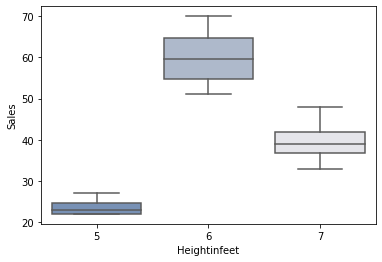

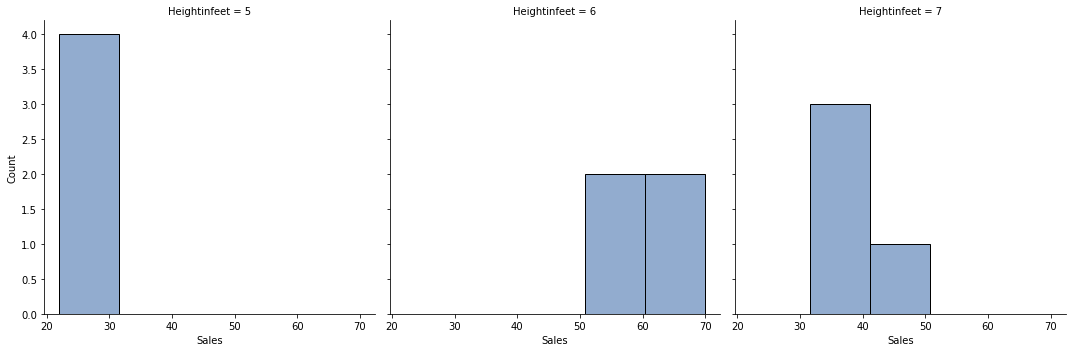

In [5]:
# Set the color palette
sns.set_palette(sns.color_palette("vlag"))

#See the distribution of the data

#boxplot
sns.boxplot(data=df, x="Heightinfeet", y="Sales")

#histogram
sns.displot(data=df, x="Sales", col="Heightinfeet")

#Show plot
plt.show()

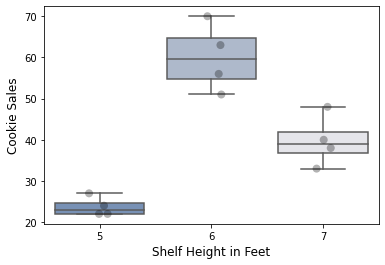

In [6]:
#Boxplot with striplot - each individual data point super-imposed on boxplot
sns.boxplot(data=df, x="Heightinfeet", y="Sales")
sns.stripplot(data=df, x="Heightinfeet", y="Sales", color = 'black', size = 8, alpha = 0.3)
plt.xlabel("Shelf Height in Feet", size = 12)
plt.ylabel("Cookie Sales", size = 12)
plt.show()

In [7]:
#What are average sales overall?
print(round(df['Sales'].mean(),1))

41.2


In [8]:
#What is the average & total sales by shelf location?
#Group by heightinfeet and take mean, median, and sum of sales
df.groupby('Heightinfeet').agg({'Sales': ['mean', 'median', 'sum']})

Sales            
               mean median  sum
Heightinfeet                   
5             23.75   23.0   95
6             60.00   59.5  240
7             39.75   39.0  159

**<font color=green>Insights from the data visualization & summary statistics</font>**

1. Overall average sales over the entire dataset is 41.
2. Higher sales when shelf height is at 6 feet. On average 60.
3. Lower sales when shelf height as at 5 feet. On average 24.

## Forecast Modeling

In [9]:
#Convert Heightinfeet from numeric to categorical object
df['Heightinfeet'] = df['Heightinfeet'].astype('category') 

In [10]:
# Create the model object
forecast_model = ols("Sales ~ Heightinfeet", data=df)

# Fit the model
forecast_model = forecast_model.fit()

# Print the summary of the fitted model
print(forecast_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     34.99
Date:                Mon, 11 Jul 2022   Prob (F-statistic):           5.69e-05
Time:                        18:47:23   Log-Likelihood:                -37.083
No. Observations:                  12   AIC:                             80.17
Df Residuals:                       9   BIC:                             81.62
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            23.7500      3.07

<font size="5">**Interpreting the OLS (least squares) output**</font>


**Coefficients**

*Intercept(B0)*

The intercept is the value of our dependent variable (Oreo sales) when all of the independent variables are zero. In this case, the intercept is to fit the model and has no managerial interpretation as this implies we will sell 23.75 units of Oreos if they are on a shelf at 0 height (essentially sitting on the floor). 

*Heightinfeet6(B1), Heightinfeet7(B2)*

A positive coefficient indicates that as the value of the independent variable increases (height), the mean of the dependent variable (sales) also tends to increase.

At 5 feet sales are 23.75. Now we interpret 6 and 7 feet in relation to the 5 feet shelf location.

At 6 feet sales increases by a whopping 36 units, but at 7 feet sales decrease by 7.75 units in relation to 5 feet, while all other variables remaining at the same level. 

Overall, 6 feet is better location for our Oreos.

**Standard error (std err)**

Standard error of estimated coefficient.

**t statistic (t)**

We want to know if the t-statistic falls within the rejection region. One of 3 approaches to do a hypothesis test using regression output.

**Confidence Intervals** [0.025      0.975]

This informs us if the beta coefficient falls within the confidence interval range. For example, at 5 feet sales are 24, but can be within the range of 17 to 31.  The second of 3 approaches to do a hypothesis test using regression output.


**P-values**

p-values are <.05 for both independent variables. (Heightinfeet[T.6] & Heightinfeet[T.7]).  The last of the 3 approaches to do a hypothesis test using regression output.

**R-squared/Coefficient of determination**

The r-squared value of 0.886 indictes that 89% of the variation in sales is explained by shelf-height. The remaining variation of 11% goes unexplained. A goodness of fit measure for regression output.

**F-statistic**

The f-statistic of 35 tells us whether the model is significant or not significant. The model is significant if any of the coefficients are nonzero.

**How do we write our equation if we want to use this linear model to forecast sales?**

Our equation: Sales = 30.25 + 29.75*(6 feet) + 11*(7 feet)


Luckily, for us we can use Python to do the math for us to predict future sales based on our equation.

## Build Forecast Model 

In [11]:
# Create new DataFrame to hold our future forecast
# Create explanatory_data 
explanatory_data = df

print(explanatory_data)

    Observation Heightinfeet  Sales
0             1            5     24
1             2            6     56
2             3            7     40
3             4            5     27
4             5            5     22
5             6            6     70
6             7            6     51
7             8            7     38
8             9            7     33
9            10            5     22
10           11            6     63
11           12            7     48


In [12]:
#Use forecast_model to predict future sales using predict function
future_sales = forecast_model.predict(explanatory_data)

In [13]:
# Create prediction_data
# Future_sales has been added as a column to the explanatory data DataFrame
prediction_data = explanatory_data.assign(
   future_sales = future_sales)

print(prediction_data)

    Observation Heightinfeet  Sales  future_sales
0             1            5     24         23.75
1             2            6     56         60.00
2             3            7     40         39.75
3             4            5     27         23.75
4             5            5     22         23.75
5             6            6     70         60.00
6             7            6     51         60.00
7             8            7     38         39.75
8             9            7     33         39.75
9            10            5     22         23.75
10           11            6     63         60.00
11           12            7     48         39.75


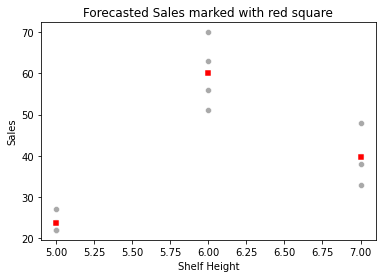

In [14]:
#Plot predictions, but first convert Heightinfeet back to numeric object
df['Heightinfeet'] = pd.to_numeric(df['Heightinfeet'])

# Plot first the data for our original dataset
fig = plt.figure()
sns.scatterplot(x="Heightinfeet",
            y="Sales",
            data=df,
            color = "darkgrey",
            marker = "o")

# Add a second scatter plot layer from the prediction data
sns.scatterplot(x="Heightinfeet",
            y="future_sales",
            data=prediction_data,
            color = "red",
            marker = "s")

# Add title
plt.title('Forecasted Sales marked with red square')

#Add x-label
plt.xlabel('Shelf Height')

# Show the plot
plt.show()

In [15]:
print(prediction_data.head())

   Observation Heightinfeet  Sales  future_sales
0            1            5     24         23.75
1            2            6     56         60.00
2            3            7     40         39.75
3            4            5     27         23.75
4            5            5     22         23.75


All regression models have errors. Errors are the difference between the actual sales and predicted sales.

In [16]:
#Add Errors to dataframe
prediction_data['errors'] = prediction_data['Sales'] - prediction_data['future_sales']

print(prediction_data)

    Observation Heightinfeet  Sales  future_sales  errors
0             1            5     24         23.75    0.25
1             2            6     56         60.00   -4.00
2             3            7     40         39.75    0.25
3             4            5     27         23.75    3.25
4             5            5     22         23.75   -1.75
5             6            6     70         60.00   10.00
6             7            6     51         60.00   -9.00
7             8            7     38         39.75   -1.75
8             9            7     33         39.75   -6.75
9            10            5     22         23.75   -1.75
10           11            6     63         60.00    3.00
11           12            7     48         39.75    8.25


In [17]:
#Total sum of errors
print(prediction_data['errors'].sum())


4.263256414560601e-14


Practically speaking, if we wanted to forecast sales (without a future dataframe) at 6 feet we would calculate it like the following:

In [18]:
sales_at_six_feet = 23.75 + 36.25*(1) + 16*(0)
print(sales_at_six_feet)

60.0


What about at five feet?

In [19]:
sales_at_five_feet = 23.75 + 36.25*(0) + 16*(0)
print(sales_at_five_feet)

23.75


What about at seven feet?


In [20]:
sales_at_seven_feet = 23.75 + 36.25*(0) + 16*(1)
print(sales_at_seven_feet)

39.75


## Build Forecast Model at All Shelf Heights

In [21]:
#Group by heightinfeet and take mean and sum of sales
prediction_data.groupby('Heightinfeet').agg({'future_sales': ['mean', 'sum']})

future_sales       
                     mean    sum
Heightinfeet                    
5                   23.75   95.0
6                   60.00  240.0
7                   39.75  159.0

## Key Takeaways

Does shelf location impact sales?

Yes absolutely! If we want to maximize sales, then placing our product at 6 feet gives us the best sales. We will sell on average 60 units and we can expect to sell 240 total units.

### When you have one categorical variable in a linear regression model, the coefficients of the model are the means of each category. You can get the means by removing the intercept from the model as illustrated below

In [22]:
#Convert Heightinfeet from numeric to categorical object
df['Heightinfeet'] = df['Heightinfeet'].astype('category') 

# Create the model object
forecast_model = ols("Sales ~ Heightinfeet + 0", data=df)

# Fit the model
forecast_model = forecast_model.fit()

# Print the coefficients only - the .params attribute
print(forecast_model.params)

Heightinfeet[5]    23.75
Heightinfeet[6]    60.00
Heightinfeet[7]    39.75
dtype: float64


As you can see, the coefficients with the intercept removed are the same as our forecast!